# Erkundung und Vorhersage der Hauspreise in Boston

In diesem Projekt analysieren wir den Boston Housing Datensatz, um ein besseres Verständnis der Faktoren zu gewinnen, die die Hauspreise in Boston beeinflussen. Unser Ziel ist es, verschiedene maschinelle Lernmodelle und ein einfaches neuronales Netzwerk zu testen, um die beste Methode zur Vorhersage des Medianwertes der Eigenheimbesitzer (MEDV) zu finden.

Durch diesen Prozess werden wir:

1. Die Daten erkunden und wichtige Merkmale identifizieren.
2. Datenaufbereitungstechniken anwenden, um die Daten für die Modellierung vorzubereiten.
3. Verschiedene maschinelle Lernmodelle und ein neuronales Netzwerk erstellen und trainieren.
4. Die Modelle bewerten und vergleichen, um das leistungsstärkste Modell zu bestimmen.
5. Die wichtigsten Erkenntnisse und Schlussfolgerungen klar und verständlich kommunizieren.

Dieses Projekt dient nicht nur dazu, die Vorhersagegenauigkeit der Hauspreise zu verbessern, sondern auch dazu, unsere Fähigkeiten in der Datenanalyse, dem maschinellen Lernen und der Kommunikation von Ergebnissen weiter zu vertiefen.


### Ziele Definieren:
1. **Verständnis von Datenanalyse und -exploration:** Meine Fähigkeit verbessern, große Datensätze zu erkunden und zu analysieren. Wichtige Merkmale zu identifizieren und interessante Muster und Zusammenhänge in den Daten finden.

2. **Vertiefung in maschinelles Lernen:** Mehr praktische Erfahrungen mit verschiedenen Modellen. Modelle mit geeigneten Metriken bewertet und wie man die Ergebnisse interpretiert, um fundierte Schlussfolgerungen zu ziehen.

3. **Vertiefung des Workflows:** Ein besseres Verständnis für den Ablauf eines Data-Science-Projekts gewinnen.

## 1.Explorative Datenanalyse, Datenbereinigung und Normalisierung

In [1]:
# Import librarys
import pandas as pd
import numpy as np

# Load CSV file in  DataFrame
df = pd.read_csv('HousingData.csv') 

# Verify the data is loaded correctly by displaying the first few rows
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,NaN,36.2


In [2]:
# Check for nan values
missing_values = df.isnull().sum()
print("Anzahl der fehlenden Werte pro Spalte:\n", missing_values)

Anzahl der fehlenden Werte pro Spalte:
 CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
LSTAT      20
MEDV        0
dtype: int64


In [3]:
# Check  datatypes for appropriate datamining
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object

In [4]:
#Replace missing data with frequency --> feature has dummy variable, can be just 1 or 0
MostFrequentEntry =df['CHAS'].value_counts().idxmax()
df['CHAS'] = df['CHAS'].replace(np.nan,MostFrequentEntry)

# change type form float to int (becuase just 0 or 1 )
df['CHAS'] = df['CHAS'].astype('int')
print(df.dtypes)


CRIM       float64
ZN         float64
INDUS      float64
CHAS         int32
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object


In [5]:
# Replace all missing countinous data with the median
for column in df.columns:
    if df[column].isnull().sum() > 0:
        if df[column].dtype in ['float64']:
            df[column].fillna(df[column].median(), inplace=True)
            
#check again
missing_values = df.isnull().sum()
print("Anzahl der fehlenden Werte pro Spalte:\n", missing_values)

Anzahl der fehlenden Werte pro Spalte:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64


In [6]:
# check for duiplicated values
duplicate_rows = df.duplicated().sum()
print("Anzahl der doppelten Zeilen: ", duplicate_rows)

Anzahl der doppelten Zeilen:  0


In [7]:
# calulation for descriptive statistic
descriptive_stats = df.describe().transpose()

# adding modus and varianz to the statistic
descriptive_stats['Modus'] = df.mode().iloc[0]
descriptive_stats['Varianz'] = df.var()


descriptive_stats

,count,mean,std,min,25%,50%,75%,max,Modus,Varianz
CRIM,506.0,3.479140,8.570832,0.00632,0.083235,0.253715,2.808720,88.9762,0.253715,73.459162
ZN,506.0,10.768775,23.025124,0.00000,0.000000,0.000000,0.000000,100.0000,0.000000,530.156330
INDUS,506.0,11.028893,6.704679,0.46000,5.190000,9.690000,18.100000,27.7400,18.100000,44.952726
CHAS,506.0,0.067194,0.250605,0.00000,0.000000,0.000000,0.000000,1.0000,0.000000,0.062803
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.538000,0.624000,0.8710,0.538000,0.013428
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.208500,6.623500,8.7800,5.713000,0.493671
AGE,506.0,68.845850,27.486962,2.90000,45.925000,76.800000,93.575000,100.0000,100.000000,755.533102
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.207450,5.188425,12.1265,3.495200,4.434015
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.000000,24.000000,24.0000,24.000000,75.816366
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.000000,666.000000,711.0000,666.000000,28404.759488


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, spearmanr

normality_test_results = {column: shapiro(df[column]).pvalue for column in df.columns}

# Correltion calulation
pearson_corr = df.corr(method='pearson')
spearman_corr = df.corr(method='spearman')

# Interpretation based on standard deviation
correlation_results = {}
for column in df.columns:
    if column != 'MEDV':
        if normality_test_results[column] > 0.05 and normality_test_results['MEDV'] > 0.05:
            corr_value = pearson_corr.loc[column, 'MEDV']
            method = 'Pearson'
        else:
            corr_value = spearman_corr.loc[column, 'MEDV']
            method = 'Spearman'
        correlation_results[column] = (corr_value, method)
        

# Print result
correlation_results

{'CRIM': (-0.543368495989045, 'Spearman'),
 'ZN': (0.4321082151166079, 'Spearman'),
 'INDUS': (-0.5654182981768112, 'Spearman'),
 'CHAS': (0.150701438395077, 'Spearman'),
 'NOX': (-0.5626088297953196, 'Spearman'),
 'RM': (0.6335764254337743, 'Spearman'),
 'AGE': (-0.5440923753489345, 'Spearman'),
 'DIS': (0.4458568541441563, 'Spearman'),
 'RAD': (-0.3467762570566875, 'Spearman'),
 'TAX': (-0.5624106263737142, 'Spearman'),
 'PTRATIO': (-0.5559046822691174, 'Spearman'),
 'LSTAT': (-0.8355150204719977, 'Spearman')}

Um die Korrelationen besser zu veranschaulichen, nehmen wir die absoluten Werte der Korrelationen zwischen den unabhängigen Variablen und der abhängigen Variable und visualisieren sie, um bessere Erkenntnisse zu gewinnen.

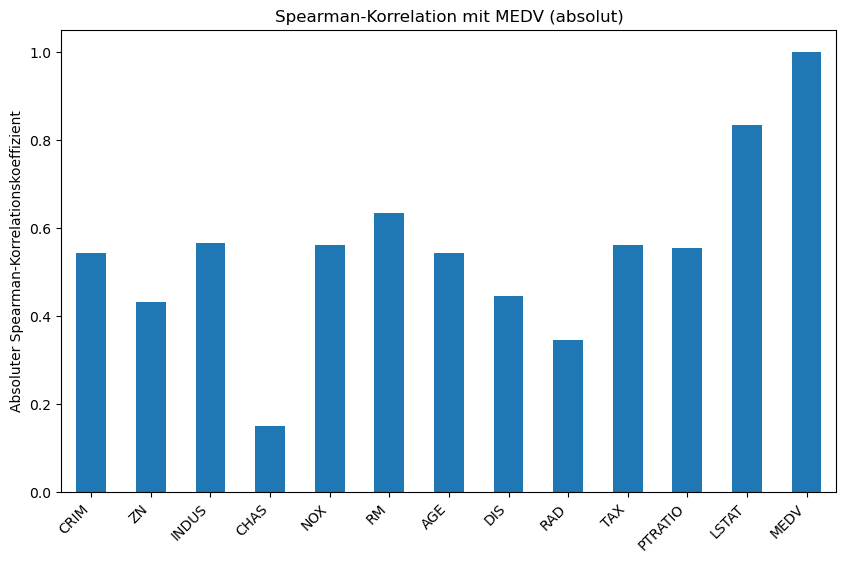

In [9]:
# Select all rows for the 'MEDV' column and take absolute values
spearman_corr_abs = spearman_corr.loc[:, 'MEDV'].abs()

# Plot as a bar chart
plt.figure(figsize=(10, 6))
spearman_corr_abs.plot(kind='bar')

# Set labels and title
plt.ylabel('Absoluter Spearman-Korrelationskoeffizient')
plt.title('Spearman-Korrelation mit MEDV (absolut)')
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()

Wir sehen, dass die größten Korrelationen, die zwischen MEDV und allen Features auftreten, sind:

 - LSTAT
 - RM
 - INDUS
 - CRIM
 
Deswegen werden wir LSTAT, RM und CRIM jeweils in einem Streudiagramm visualisieren, um bessere Erkenntnisse zu gewinnen.

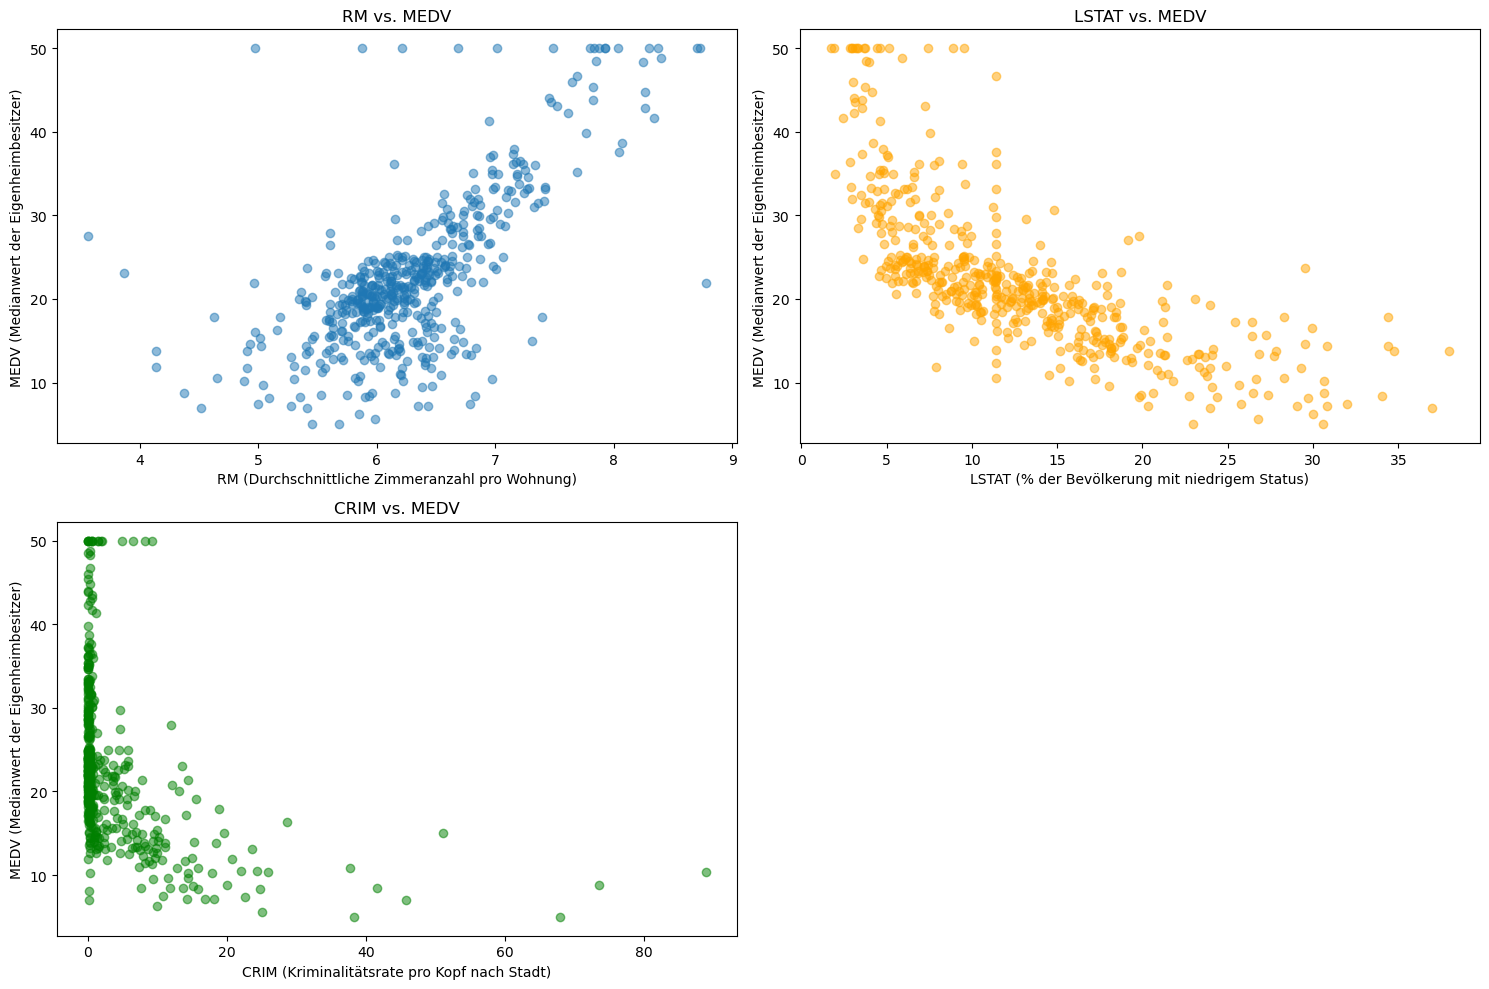

In [10]:
# Creating Scattee 2x2-Layout 
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Scatterplot for RM vs. MEDV
axs[0, 0].scatter(df['RM'], df['MEDV'], alpha=0.5)
axs[0, 0].set_xlabel('RM (Durchschnittliche Zimmeranzahl pro Wohnung)')
axs[0, 0].set_ylabel('MEDV (Medianwert der Eigenheimbesitzer)')
axs[0, 0].set_title('RM vs. MEDV')

# Scatterplot for LSTAT vs. MEDV
axs[0, 1].scatter(df['LSTAT'], df['MEDV'], alpha=0.5, color='orange')
axs[0, 1].set_xlabel('LSTAT (% der Bevölkerung mit niedrigem Status)')
axs[0, 1].set_ylabel('MEDV (Medianwert der Eigenheimbesitzer)')
axs[0, 1].set_title('LSTAT vs. MEDV')

# Scatterplot for CRIM vs. MEDV
axs[1, 0].scatter(df['CRIM'], df['MEDV'], alpha=0.5, color='green')
axs[1, 0].set_xlabel('CRIM (Kriminalitätsrate pro Kopf nach Stadt)')
axs[1, 0].set_ylabel('MEDV (Medianwert der Eigenheimbesitzer)')
axs[1, 0].set_title('CRIM vs. MEDV')

# Empty Plot
axs[1, 1].axis('off')

# Adjust Layout and print
plt.tight_layout()
plt.show()

### RM vs. MEDV

Die Beziehung zwischen der durchschnittlichen Zimmeranzahl pro Wohnung (RM) und dem Medianwert der Eigenheimbesitzer (MEDV) zeigt eine klare positive Korrelation. Das bedeutet, dass Häuser mit mehr Zimmern tendenziell höhere Medianwerte aufweisen. Diese positive Korrelation ist deutlich erkennbar, obwohl einige Ausreißer vorhanden sind.

### LSTAT vs. MEDV

Die Beziehung zwischen dem Prozentsatz der Bevölkerung mit niedrigem Status (LSTAT) und dem Medianwert der Eigenheimbesitzer (MEDV) zeigt eine deutliche negative Korrelation. Dies bedeutet, dass ein höherer Anteil an Bevölkerung mit niedrigem Status mit niedrigeren Medianwerten der Häuser verbunden ist. Diese negative Korrelation ist klar erkennbar, und es gibt nur wenige Ausreißer.

### CRIM vs. MEDV

Die Beziehung zwischen der Kriminalitätsrate pro Kopf (CRIM) und dem Medianwert der Eigenheimbesitzer (MEDV) zeigt eine leicht erkennbare negative Korrelation. Dies deutet darauf hin, dass höhere Kriminalitätsraten tendenziell mit niedrigeren Medianwerten der Häuser verbunden sind. Diese negative Korrelation wird erst bei höheren Kriminalitätsraten erkennbar.

-------------------------------------------------------------------------------------------------------------------------------

Wir verwenden StandardScaler aus sklearn.preprocessing, um die Daten zu standardisieren. Dadurch wird sichergestellt, dass alle Merkmale die gleiche Skala haben, was die Leistung vieler maschineller Lernmodelle verbessern kann. 

In [11]:
from sklearn.preprocessing import StandardScaler
# Initlaize scaler
scaler = StandardScaler()
#Transform Data
scaled_data  = scaler.fit_transform(df)
#Create new Dataframe with scaled Data
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

scaled_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,-0.405592,0.314369,-1.301706,-0.268391,-0.144217,0.413672,-0.132771,0.140214,-0.982843,-0.666608,-1.459000,-1.096193,0.159686
1,-0.403140,-0.468160,-0.591052,-0.268391,-0.740262,0.194274,0.366141,0.557160,-0.867883,-0.987329,-0.303094,-0.502779,-0.101524
2,-0.403142,-0.468160,-0.591052,-0.268391,-0.740262,1.282714,-0.282080,0.557160,-0.867883,-0.987329,-0.303094,-1.231709,1.324247
3,-0.402549,-0.468160,-1.321115,-0.268391,-0.835284,1.016303,-0.839258,1.077737,-0.752922,-1.106115,0.113032,-1.387195,1.182758
4,-0.398265,-0.468160,-1.321115,-0.268391,-0.835284,1.228577,-0.533356,1.077737,-0.752922,-1.106115,0.113032,-0.176116,1.487503


-------------------------------------------------------------------------------------------------------------------------------
## 2.Clustering mit Unsupervised Learning

Wir verwenden den K-Means Clustering Algorithmus, um die Stadtteile von Boston basierend auf den Merkmalen Kriminalitätsrate (CRIM), Prozentsatz der Bevölkerung mit niedrigem Status (LSTAT) und Entfernungen zu Arbeitszentren (DIS) in Gruppen zu unterteilen. Dies hilft uns, Muster und Gruppen in den Daten zu erkennen.

In [12]:
from sklearn.cluster import KMeans

features = scaled_df[['CRIM', 'LSTAT', 'DIS']]

# Using K-Means Clustering 
kmeans = KMeans(n_clusters=3, random_state=42)  
kmeans.fit(features)
scaled_df['Cluster'] = kmeans.labels_

Berechnung für die optimale Anzahl an Cluster:

In [13]:
from sklearn.metrics import silhouette_score

# Silhouetten-Koeffizienten list
silhouette_scores = []

# Calculation of Silhouetten-coefficient for numbers of cluster between 2 - 11
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(features)
    silhouette_avg = silhouette_score(features, cluster_labels)
    silhouette_scores.append((n_clusters, silhouette_avg))

# Find the number with the best score
optimal_clusters = max(silhouette_scores, key=lambda x: x[1])[0]

optimal_clusters

2

Visualisierung der Silhouetten-Koeffizient und der Anzahl an Cluster:

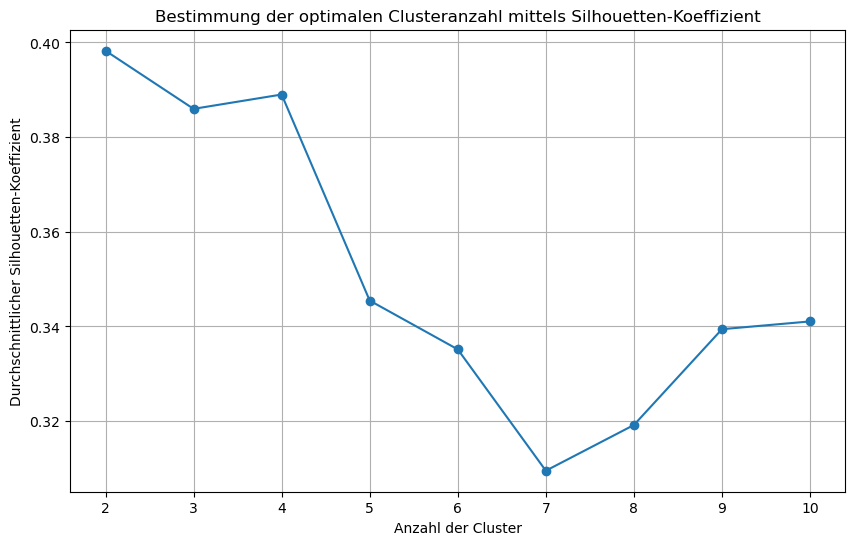

Die optimale Anzahl von Clustern ist: 2


In [14]:
# Visualizing the Silhouetten-coefficient
clusters, scores = zip(*silhouette_scores)
plt.figure(figsize=(10, 6))
plt.plot(clusters, scores, marker='o')
plt.xlabel('Anzahl der Cluster')
plt.ylabel('Durchschnittlicher Silhouetten-Koeffizient')
plt.title('Bestimmung der optimalen Clusteranzahl mittels Silhouetten-Koeffizient')
plt.grid(True)
plt.show()

print(f'Die optimale Anzahl von Clustern ist: {optimal_clusters}')

Das Liniendiagramm zeigt, dass 2 Cluster den höchsten Silhouetten-Koeffizienten haben. Daher werden wir ein neues Modell mit 2 Clustern erstellen und 2D-Streudiagramme erzeugen, um die Ergebnisse zu interpretieren:

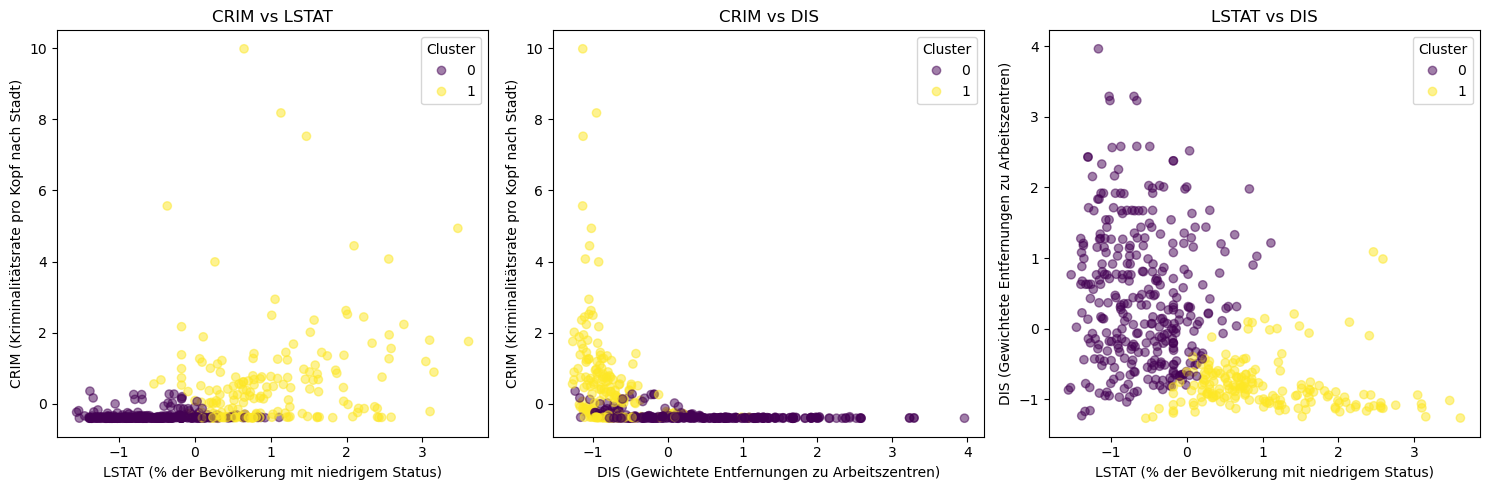

In [15]:
#Creating new k-Means Cluster with 2 Clusters
kmeans = KMeans(n_clusters=2, random_state=42)  
kmeans.fit(features) 
scaled_df['Cluster'] = kmeans.labels_

fig = plt.figure(figsize=(15, 5))

# Subplot 1: CRIM vs LSTAT
ax1 = fig.add_subplot(131)
scatter = ax1.scatter( scaled_df['LSTAT'],scaled_df['CRIM'], c=scaled_df['Cluster'], cmap='viridis', alpha=0.5)
ax1.set_ylabel('CRIM (Kriminalitätsrate pro Kopf nach Stadt)')
ax1.set_xlabel('LSTAT (% der Bevölkerung mit niedrigem Status)')
ax1.set_title('CRIM vs LSTAT')
ax1.legend(*scatter.legend_elements(), title='Cluster')

# Subplot 2: CRIM vs DIS
ax2 = fig.add_subplot(132)
scatter = ax2.scatter( scaled_df['DIS'],scaled_df['CRIM'], c=scaled_df['Cluster'], cmap='viridis', alpha=0.5)
ax2.set_ylabel('CRIM (Kriminalitätsrate pro Kopf nach Stadt)')
ax2.set_xlabel('DIS (Gewichtete Entfernungen zu Arbeitszentren)')
ax2.set_title('CRIM vs DIS')
ax2.legend(*scatter.legend_elements(), title='Cluster')

# Subplot 3: LSTAT vs DIS
ax3 = fig.add_subplot(133)
scatter = ax3.scatter(scaled_df['LSTAT'], scaled_df['DIS'], c=scaled_df['Cluster'], cmap='viridis', alpha=0.5)
ax3.set_xlabel('LSTAT (% der Bevölkerung mit niedrigem Status)')
ax3.set_ylabel('DIS (Gewichtete Entfernungen zu Arbeitszentren)')
ax3.set_title('LSTAT vs DIS')
ax3.legend(*scatter.legend_elements(), title='Cluster')

plt.tight_layout()
plt.show()

### 1. CRIM vs LSTAT

  - **Cluster 0 (lila):** Diese Gruppe zeichnet sich durch niedrigere Kriminalitätsraten und einen geringeren Prozentsatz der Bevölkerung mit niedrigem Status aus.
  - **Cluster 1 (gelb):** Diese Gruppe hat höhere Kriminalitätsraten und einen höheren Prozentsatz der Bevölkerung mit niedrigem Status.
  - **Interpretation:** Es gibt eine klare Trennung zwischen den beiden Clustern, wobei Cluster 1 tendenziell höhere Werte für beide Merkmale aufweist.

### 2. CRIM vs DIS

  - **Cluster 0 (lila):** Diese Gruppe hat niedrigere Kriminalitätsraten und eine größere Distanz zu den Arbeitszentren.
  - **Cluster 1 (gelb):** Diese Gruppe hat höhere Kriminalitätsraten und befindet sich näher an den Arbeitszentren.
  - **Interpretation:** Auch hier ist eine Trennung sichtbar, wobei Cluster 1 tendenziell in städtischen Gebieten mit höherer Kriminalität und geringerer Entfernung zu den Arbeitszentren liegt.

### 3. LSTAT vs DIS

  - **Cluster 0 (lila):** Diese Gruppe hat einen geringeren Prozentsatz der Bevölkerung mit niedrigem Status und eine größere Distanz zu den Arbeitszentren.
  - **Cluster 1 (gelb):** Diese Gruppe hat einen höheren Prozentsatz der Bevölkerung mit niedrigem Status und befindet sich näher an den Arbeitszentren.
  - **Interpretation:** Die Trennung zwischen den Clustern ist deutlich, wobei Cluster 1 höhere Werte für LSTAT und geringere Werte für DIS aufweist.

-------------------------------------------------------------------------------------------------------------------------------

## 3. Modellierung mit Supervised Learning

Wir unterteilen unseren Datensatz in Test-/Trainingsdaten auf.

In [16]:
from sklearn.model_selection import train_test_split

# Dividing the depentend and independet features
Y = scaled_df['MEDV']
X = scaled_df.drop(['MEDV','Cluster'],axis=1)

# Splitting the data into train and test Set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

### 3.1 Multiple Lineare Regression

Wir werden zunächst eine multiple Regression anwenden, um Vorhersagen zu machen. Dabei verwenden wir als unabhängige Variablen nur LSTAT, RM und DIS.

In [17]:
from sklearn.linear_model import LinearRegression

# Selecting th features LSTAT, RM, DIS
x_lr_train = x_train[['LSTAT','RM','DIS']]
x_lr_test = x_test[['LSTAT','RM','DIS']]

# Build the Model
lr = LinearRegression()

#Train the Model with testdata
lr.fit(x_lr_train,y_train)

LinearRegression()

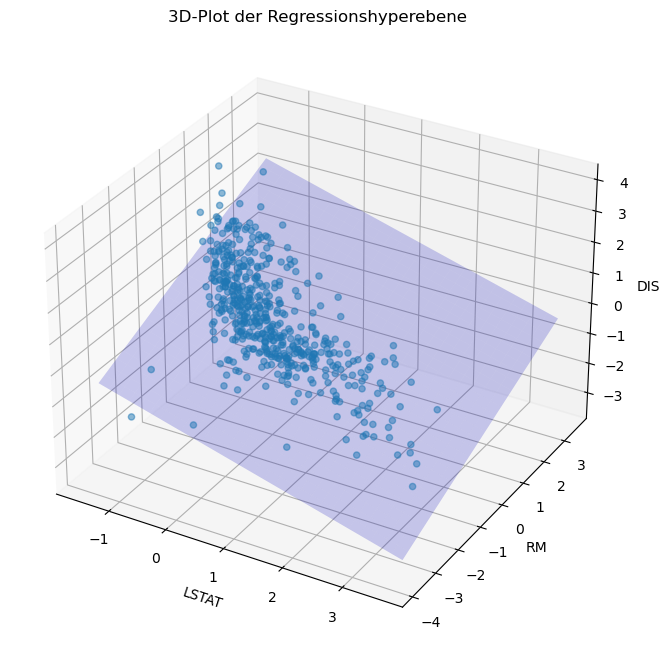

In [18]:
import warnings
warnings.filterwarnings('ignore')
# Prediction with testdata
y_pred = lr.predict(x_lr_test)

# Prepare data for visualization
lstat_range = np.linspace(x_lr_train['LSTAT'].min(), x_lr_train['LSTAT'].max(), 30)
rm_range = np.linspace(x_lr_train['RM'].min(), x_lr_train['RM'].max(), 30)
# Creating 2D grid
lstat_grid, rm_grid = np.meshgrid(lstat_range, rm_range)

# Estatimate mean of 3. feature
dis_mean = x_test['DIS'].mean()

model_viz = np.array([lstat_grid.ravel(), rm_grid.ravel(), np.full(lstat_grid.ravel().shape, dis_mean)]).T

# Calculating hyperplane
hyperplane = lr.intercept_ + lr.coef_[0] * lstat_grid + lr.coef_[1] * rm_grid + lr.coef_[2] * dis_mean

# Creating 3D-fig 
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatterplot of data
sc = ax.scatter(scaled_df['LSTAT'], scaled_df['RM'], scaled_df['DIS'], marker='o', alpha=0.5)

ax.set_xlabel('LSTAT')
ax.set_ylabel('RM')
ax.set_zlabel('DIS')
ax.set_title('3D-Plot der Regressionshyperebene')

# Plotting Hyperplane
ax.plot_surface(lstat_grid, rm_grid, hyperplane, color='blue', alpha=0.2)

plt.show()

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error,r2_score

lr_R2_score = lr.score(x_lr_test,y_test)
lr_mae = mean_absolute_error(y_test, y_pred)
lr_mse = mean_squared_error(y_test, y_pred)

print('R2 Score:', lr_R2_score)
print('mse Score:', lr_mae)
print('mse Score:', lr_mse)

R2 Score: 0.5719166418553812
mse Score: 0.42211224777098466
mse Score: 0.37186848154765595


-------------------------------------------------------------------------------------------------------------------------------

### 3.2 K-Nearest Neighbors

Wir verwenden für das KNN Model alle unabhängingen features wieder.

In [20]:
from sklearn.neighbors import KNeighborsRegressor

# Building the KNN model
knn = KNeighborsRegressor(n_neighbors=5, algorithm='ball_tree', metric='euclidean')

# Training the KNN model
knn.fit(x_train, y_train)


KNeighborsRegressor(algorithm='ball_tree', metric='euclidean')

In [21]:
# Predicting with the test set
y_pred = knn.predict(x_test)

# Evaluating the model
knn_r2 = r2_score(y_test, y_pred)
knn_mae = mean_absolute_error(y_test, y_pred)
knn_mse = mean_squared_error(y_test, y_pred)

print(f'R^2 score on test data: {knn_r2:.2f}')
print(f'Mean Absolute Error (MAE) on test data: {knn_mae:.2f}')
print(f'Mean Squared Error (MSE) on test data: {knn_mse:.2f}')

R^2 score on test data: 0.71
Mean Absolute Error (MAE) on test data: 0.30
Mean Squared Error (MSE) on test data: 0.25


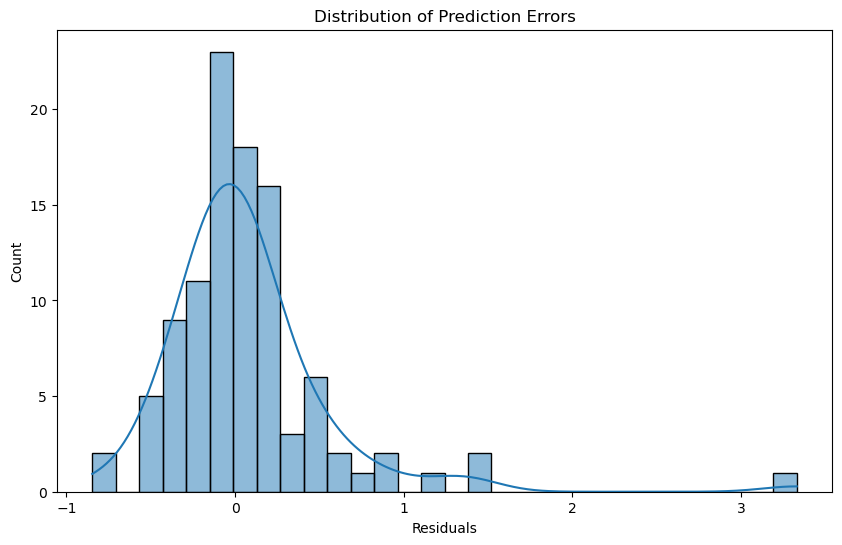

In [22]:
# Distribution of prediction errors
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Prediction Errors')
plt.show()

### 3.3 Entscheidungsbaum

Auch beim Entscheidungsbaum werden alle features wieder verwendet.

In [23]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Building the Decision Tree model with max depth of 3
decision_tree = DecisionTreeRegressor(max_depth=3)

# Training the Decision Tree model
decision_tree.fit(x_train, y_train)


DecisionTreeRegressor(max_depth=3)

In [24]:
# Predicting with the test set
y_pred = decision_tree.predict(x_test)

# Evaluating the model
dt_r2 = r2_score(y_test, y_pred)
dt_mae = mean_absolute_error(y_test, y_pred)
dt_mse = mean_squared_error(y_test, y_pred)

print(f'R^2 score on test data: {dt_r2:.2f}')
print(f'Mean Absolute Error (MAE) on test data: {dt_mae:.2f}')
print(f'Mean Squared Error (MSE) on test data: {dt_mse:.2f}')

R^2 score on test data: 0.73
Mean Absolute Error (MAE) on test data: 0.35
Mean Squared Error (MSE) on test data: 0.24


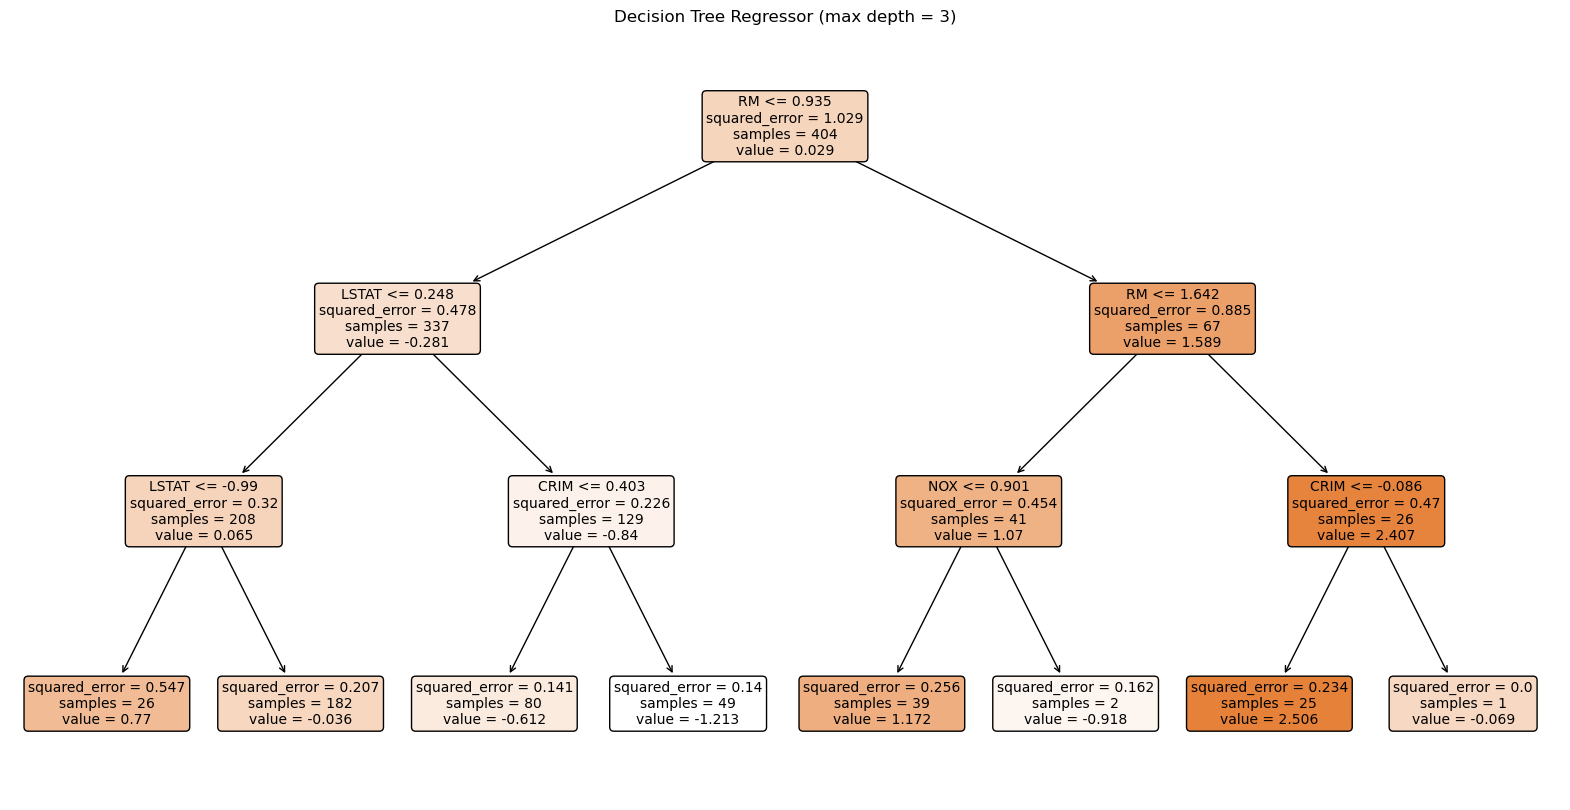

In [25]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Regressor (max depth = 3)")
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

### 3.3 Feedforward-Neuronales Netzwerk

In [26]:
!pip install torch --no-deps

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim

# Converting to NumPy-Arrays
X_train = x_train.values
X_test = x_test.values


y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)


# Converting to PyTorch-tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [31]:
# Define neural network
class FeedforwardNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FeedforwardNN, self).__init__()
        self.input_layer = nn.Linear(input_size, hidden_size)
        self.hidden_layer = nn.Linear(hidden_size, hidden_size)
        self.output_layer = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.input_layer(x)
        out = self.relu(out)
        out = self.hidden_layer(out)
        out = self.relu(out)
        out = self.output_layer(out)
        return out

# Hyperparameter
input_size = X_train.shape[1]
hidden_size = 5
output_size = 1
num_epochs = 100
learning_rate = 0.001

# Modell, loss function and optimizer
model = FeedforwardNN(input_size, hidden_size, output_size)
criterion = nn.MSELoss() #choosing mse loss fuction
optimizer = optim.Adam(model.parameters(), lr=learning_rate) #choosing adam optimizer



In [32]:
# Train the model
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print every 10th epoch out
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Output of final loss
print(f'Final Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 1.1875
Epoch [20/100], Loss: 1.1173
Epoch [30/100], Loss: 1.0592
Epoch [40/100], Loss: 1.0087
Epoch [50/100], Loss: 0.9606
Epoch [60/100], Loss: 0.9112
Epoch [70/100], Loss: 0.8606
Epoch [80/100], Loss: 0.8085
Epoch [90/100], Loss: 0.7561
Epoch [100/100], Loss: 0.7064
Final Loss: 0.7064


In [34]:
# Modelevaluation
model.eval()  # set model to evalutaion
with torch.no_grad():  # turn off grad
    y_pred = model(X_test)

# Transform data to NumPy-Array
y_pred_np = y_pred.numpy()
y_test_np = y_test.numpy()

# Calculate mse
fnn_mse = mean_squared_error(y_test_np, y_pred_np)
print(f'Mean Squared Error (MSE): {fnn_mse:.4f}')

# Calculate mae
fnn_mae = mean_absolute_error(y_test_np, y_pred_np)
print(f'Mean Absolute Error (MAE): {fnn_mae:.4f}')

# Optional: R²
fnn_r2 = 1 - (fnn_mse / np.var(y_test_np))
print(f'R²-Score: {fnn_r2:.4f}')


Mean Squared Error (MSE): 0.5690
Mean Absolute Error (MAE): 0.4759
R²-Score: 0.3450


-------------------------------------------------------------------------------------------------------------------------------

## 4. Modellvergleich


Wir erstellen ein neues DataFrame mit allen Metriken, die gemessen wurden und vergleichen sie.

In [53]:
res_data = {'R²-Score': [lr_R2_score, knn_r2, dt_r2, fnn_r2], 
            'MSE': [lr_mse, knn_mse, dt_mse, fnn_mse], 
            'MAE': [lr_mae, knn_mae, dt_mae, fnn_mae]}
results = pd.DataFrame(data=res_data, index=['Linear Regression', 'KNN', 'Decision Tree', 'Feedforward-NN'])
results

,R²-Score,MSE,MAE
Linear Regression,0.571917,0.371868,0.422112
KNN,0.707391,0.254184,0.298919
Decision Tree,0.725769,0.238219,0.346716
Feedforward-NN,0.345024,0.568966,0.475896


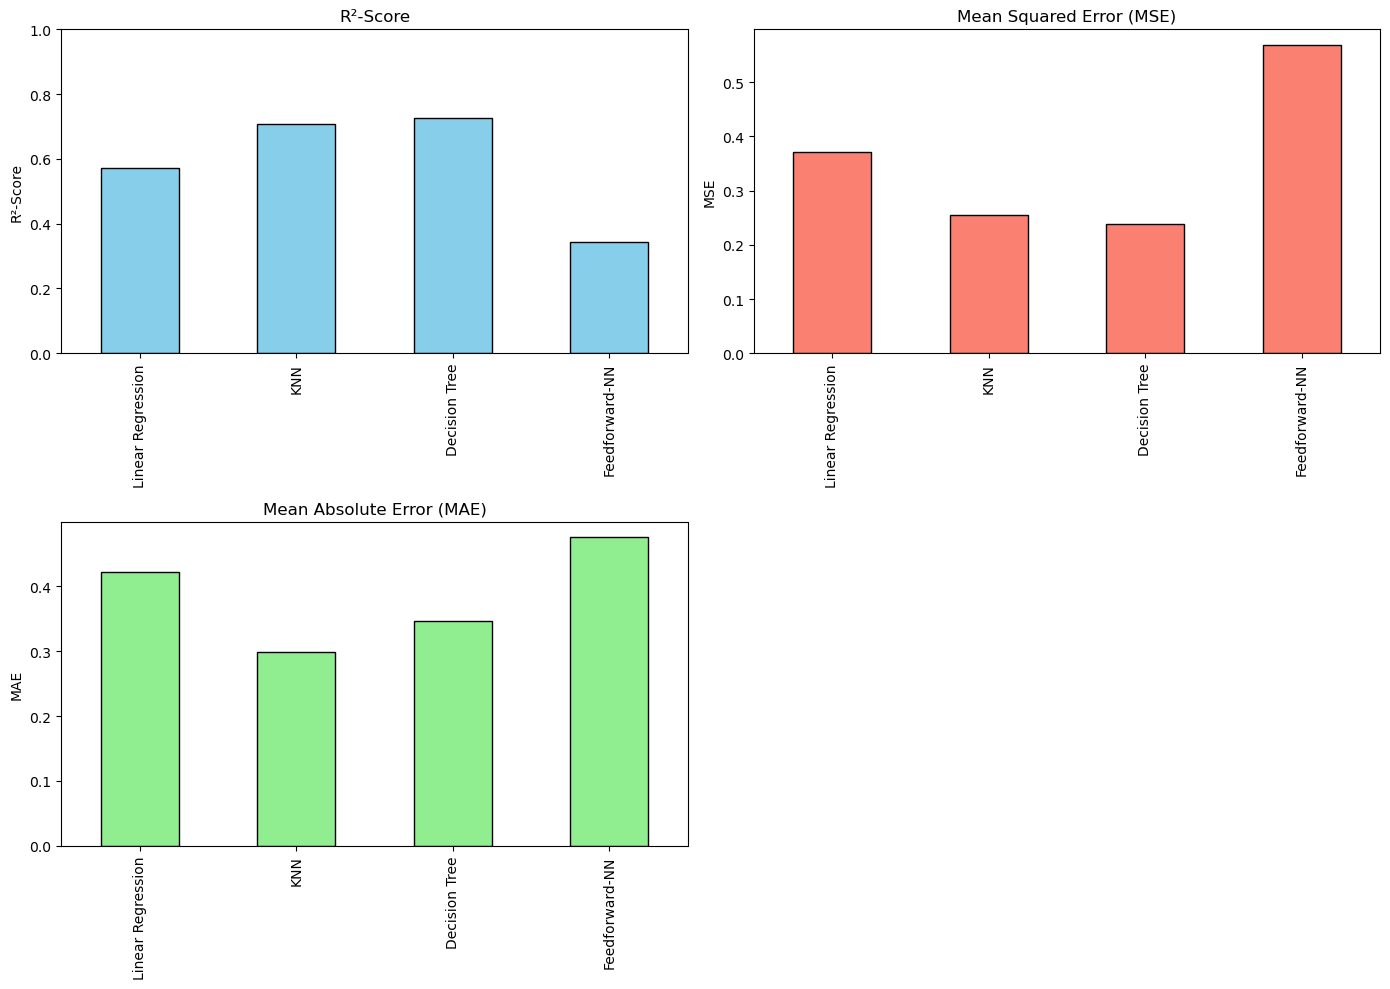

In [54]:
# Creating  subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# R²-Score
results['R²-Score'].plot(kind='bar', ax=axes[0, 0], color='skyblue', edgecolor='black')
axes[0, 0].set_title('R²-Score')
axes[0, 0].set_ylabel('R²-Score')
axes[0, 0].set_ylim(0, 1)

# MSE
results['MSE'].plot(kind='bar', ax=axes[0, 1], color='salmon', edgecolor='black')
axes[0, 1].set_title('Mean Squared Error (MSE)')
axes[0, 1].set_ylabel('MSE')

# MAE
results['MAE'].plot(kind='bar', ax=axes[1, 0], color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Mean Absolute Error (MAE)')
axes[1, 0].set_ylabel('MAE')

# empty
axes[1, 1].axis('off')


plt.tight_layout()
plt.show()

Die Ergebnisse der Modelle basierend auf dem R²-Score, dem Mean Squared Error (MSE) und dem Mean Absolute Error (MAE) zeigen folgende Interpretationen:

**1. Linear Regression**

    R²-Score: 0.571917 - Dieses Modell erklärt etwa 57.19% der Varianz der Zielvariable.
    MSE: 0.371868 - Die durchschnittliche quadratische Abweichung zwischen den vorhergesagten und den tatsächlichen Werten ist relativ hoch.
    MAE: 0.422112 - Die durchschnittliche absolute Abweichung beträgt etwa 0.422, was ebenfalls auf eine moderate Genauigkeit hinweist.

**2. KNN (K-Nearest Neighbors)**

    R²-Score: 0.707391 - Dieses Modell erklärt etwa 70.74% der Varianz der Zielvariable und ist damit besser als die lineare Regression.
    MSE: 0.254184 - Der MSE-Wert ist niedriger als bei der linearen Regression, was auf eine bessere Genauigkeit hinweist.
    MAE: 0.298919 - Der MAE-Wert ist ebenfalls niedriger, was bedeutet, dass die Vorhersagen dieses Modells im Durchschnitt näher an den tatsächlichen Werten liegen.

**3. Decision Tree**

    R²-Score: 0.725769 - Dieses Modell erklärt etwa 72.58% der Varianz der Zielvariable und ist das beste unter den getesteten Modellen.
    MSE: 0.238219 - Der niedrigste MSE-Wert unter allen Modellen zeigt, dass die Vorhersagen sehr genau sind.
    MAE: 0.346716 - Der MAE-Wert ist etwas höher als bei KNN, aber immer noch besser als bei der linearen Regression und dem Feedforward-NN.

**4. Feedforward-NN**

    R²-Score: 0.345024 - Dieses Modell erklärt nur etwa 34.50% der Varianz der Zielvariable, was auf eine schlechte Leistung hinweist.
    MSE: 0.568966 - Der höchste MSE-Wert zeigt, dass die Vorhersagen weit von den tatsächlichen Werten entfernt sind.
    MAE: 0.475896 - Der höchste MAE-Wert zeigt, dass die durchschnittliche absolute Abweichung ebenfalls am größten ist.

### 4.1 Hypothese zur Leistungsunterschiede

**Hypothese:**

Der Decision Tree zeigt eine bessere Leistung als das Feedforward-NN (FNN), weil er besser geeignet ist, die Struktur der zugrunde liegenden Daten zu erfassen. Die Implementierung des FNN könnte hingegen suboptimal sein, was zu einer schlechteren Leistung führt. Die lineare Regression schneidet moderat ab, da sie nur drei Merkmale verwendet, die möglicherweise nicht die vollständige Komplexität der Daten erfassen.

**Mögliche der Gründe für die Leistungsunterschiede**

**Decision Trees** zeigen eine überlegene Leistung, weil sie nichtlineare Beziehungen und Interaktionen zwischen Merkmalen gut erfassen können, indem sie die Daten in einer Baumstruktur aufteilen. Sie sind unempfindlich gegenüber der Skalierung der Daten, was bedeutet, dass die Merkmalswerte nicht standardisiert oder normalisiert werden müssen. Zudem können Decision Trees irrelevante Merkmale besser ignorieren, indem sie diese in den Aufspaltungsprozessen eliminieren, was besonders vorteilhaft ist, wenn der Datensatz viele irrelevante oder redundante Merkmale enthält.

Die schlechte Leistung des **Feedforward-NN** könnte auf suboptimale Hyperparameter zurückzuführen sein. Neuronale Netze sind sehr empfindlich gegenüber der Wahl der Hyperparameter wie Lernrate, Anzahl der Neuronen und Schichten, und suboptimale Werte können zu schlechter Leistung führen. Das Modell könnte auch unterunterfitting leiden, was darauf hindeutet, dass das Modell nicht genügend Kapazität hat, um die Komplexität der Daten zu erfassen. Dies könnte darauf zurückzuführen sein, dass das Modell zu klein ist (zu wenige Neuronen oder Schichten) oder dass die Trainingszeit zu kurz war.

Die **lineare Regression** zeigt eine moderate Leistung, was wahrscheinlich auf die begrenzte Anzahl von Merkmalen (LSTAT, RM und DIS) zurückzuführen ist, die verwendet wurden. Diese Merkmale erfassen möglicherweise nicht die gesamte Variabilität der Zielvariable, was zu einer moderaten Modellleistung führt. Zudem basiert die lineare Regression auf der Annahme, dass die Beziehung zwischen den Merkmalen und der Zielvariablen linear ist.

Das **KNN-Modell** zeigt eine gute Leistung, da es in der Lage ist, lokale Muster in den Daten zu erfassen, indem es die Zielvariable auf Basis der nächsten Nachbarn vorhersagt. Dies macht KNN besonders effektiv bei Datensätzen, in denen nahegelegene Datenpunkte ähnliche Werte haben.

### 4.2 Fazit:

    Das Decision Tree-Modell zeigt die beste Leistung unter den getesteten Modellen mit dem höchsten R²-Score (0.725769) und dem niedrigsten MSE (0.238219).
    Das KNN-Modell ist ebenfalls sehr leistungsfähig, mit einem R²-Score von 0.707391 und einem niedrigeren MAE (0.298919) als das Decision Tree-Modell.
    Die Lineare Regression ist moderat, aber weniger genau als Decision Tree und KNN.
    Das Feedforward-NN-Modell zeigt die schlechteste Leistung, was darauf hindeutet, dass es möglicherweise nicht das beste Modell für diesen Datensatz ist.

Insgesamt zeigt das Decision Tree den besten Kompromiss zwischen den verschiedenen Evaluationsmetriken, gefolgt von KNN. Das Feedforward-NN-Modell schneidet in allen Metriken am schlechtesten ab.